# Twitter Sentiment Analysis [NLP]

# Import Libraries

In [1]:
# Install all necessary libraries and packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and text handling
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [3]:
# Load the dataset
df= pd.read_csv('Tweets.csv')
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


# Exploratory Data Analysis

In [4]:
# Check the shape
print(df.shape)

(27481, 4)


In [5]:
# Check for missing values and drop them
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64
textID           0
text             0
selected_text    0
sentiment        0
dtype: int64


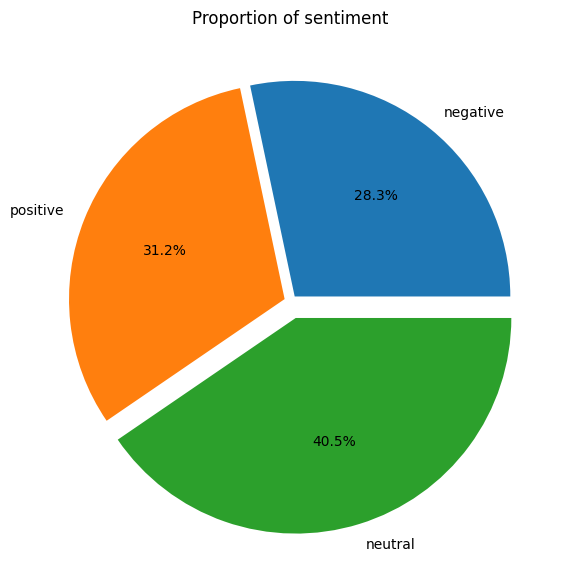

In [22]:
# check the proportion of each sentiment
x = df.sentiment.value_counts().sort_values()

plt.figure(figsize=(7, 7))
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%', explode = [0.03, 0.03, 0.08])
plt.title('Proportion of sentiment')

plt.show()

# Word Cloud

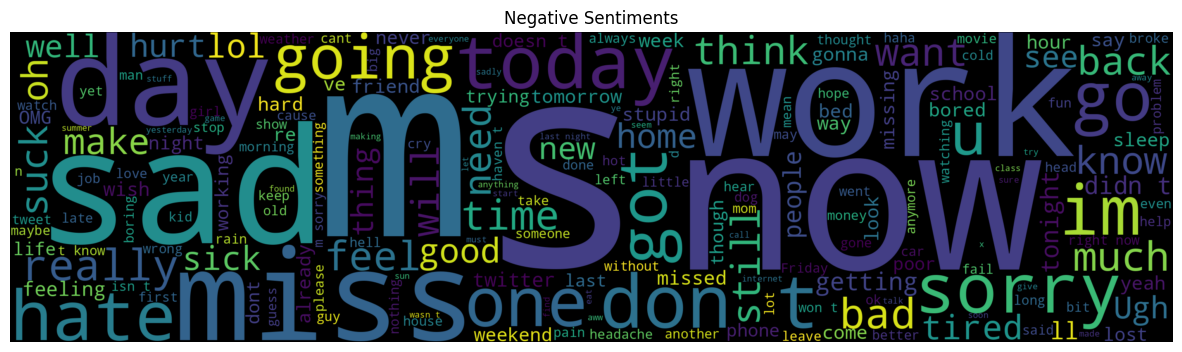

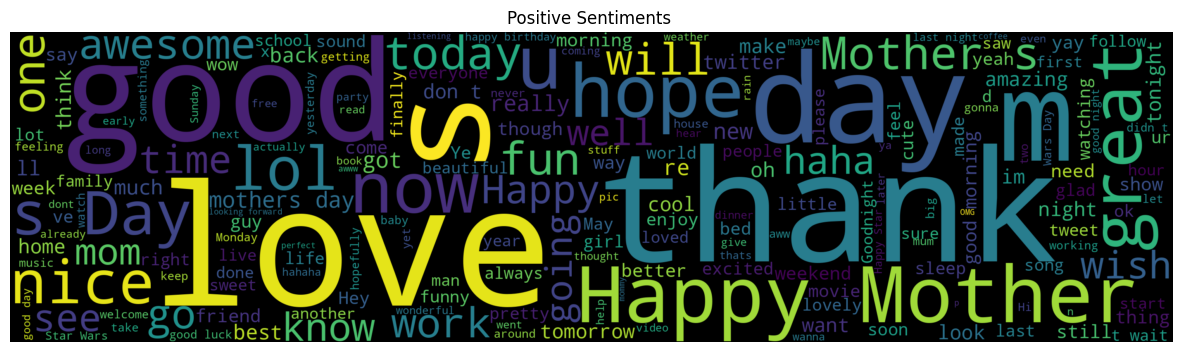

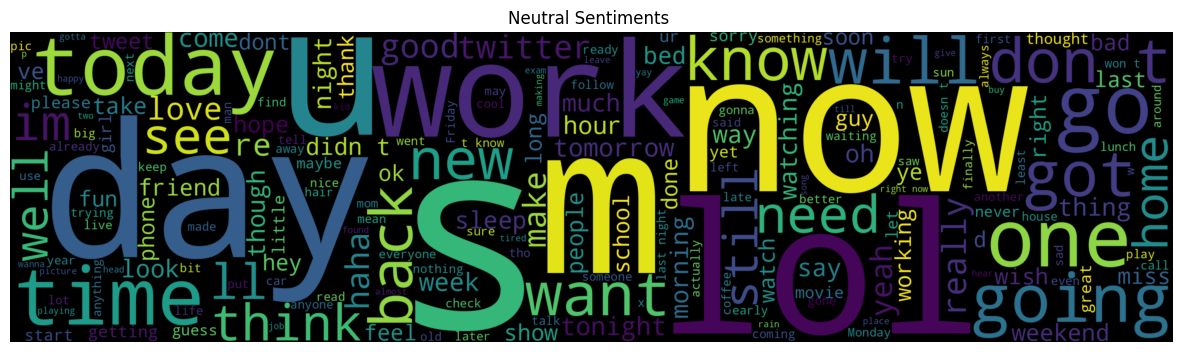

In [7]:
from wordcloud import WordCloud, STOPWORDS
negative_df = df[df['sentiment'] == 'negative']
positive_df = df[df['sentiment'] == 'positive']
neutral_df = df[df['sentiment'] == 'neutral']

# Define a function to generate and display a WordCloud
def generate_wordcloud(data, title):
    words = ' '.join(data['text'])
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT' ])
    wordcloud = WordCloud(stopwords=STOPWORDS,background_color='black',
                          width=3000, height=800).generate(cleaned_word)
    plt.figure(figsize=(15, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
# Generate and display WordClouds for each sentiment category
generate_wordcloud(negative_df, 'Negative Sentiments')
generate_wordcloud(positive_df, 'Positive Sentiments ')
generate_wordcloud(neutral_df, 'Neutral Sentiments ')

# Pre-processing

In [9]:
# Download the punkt tokenizer data
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [11]:
# Define a function to clean and preprocess the text
def preprocess_text(text):
    # Remove HTML tags and URLs
    text = re.sub(r'<.*?>|http\S+', '', text)
    # Convert text to lower case
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Perform stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]
    # Join the tokens back into a single string
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Download necessary NLTK data
import nltk
nltk.download('punkt')
nltk.download('stopwords')


# Apply preprocessing function to text column
df['cleaned_text'] = df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"` respond , go"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,sooo sad miss san diego ! ! !
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bulli ...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview ! leav alon
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"son * * * * , ` put releas alreadi bought"


# TF-IDF Vectorization

In [13]:
# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectors = tfidf_vectorizer.fit_transform(df['text'])

# Train ~ Test Split

In [14]:
# Split the data into training and test sets for the Logistic Regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectors, df['sentiment'], test_size=0.2, random_state=42)

# Machine Learning Models

In [15]:
# Importing & calling Machine learning models

# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

# Support Vector Machine
from sklearn.svm import SVC
svc = SVC()

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=42)

In [16]:
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
models = [lr_model, svc, rfc, GB]
accuracy_scores = []

# training models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test,y_pred)
    accuracy_scores.append(acc)

    print(model)
    print(f'Accuracy Score: {accuracy_score(y_test,y_pred)}')
    print()

LogisticRegression()
Accuracy Score: 0.6870451237263464

SVC()
Accuracy Score: 0.6870451237263464

RandomForestClassifier()
Accuracy Score: 0.6814046579330422

GradientBoostingClassifier(random_state=42)
Accuracy Score: 0.6442867540029112



# Model Comparison

Text(0.5, 1.0, 'Model Comparison')

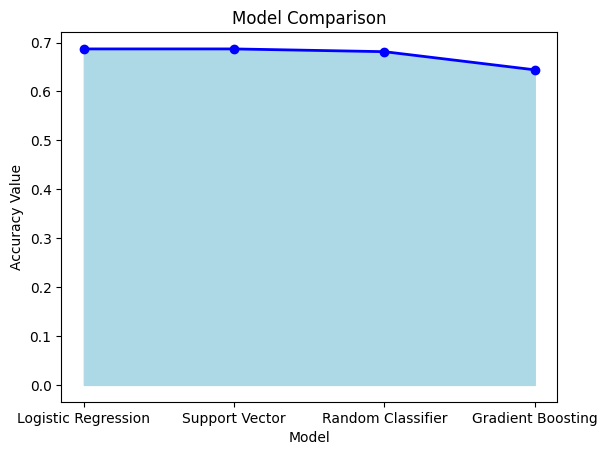

In [17]:
models = ['Logistic Regression', 'Support Vector', 'Random Classifier', 'Gradient Boosting']
plt.plot(models, accuracy_scores, label='Accuracy Score', marker='o', linestyle='-', color='b', linewidth=2)
plt.fill_between(models, accuracy_scores, color='lightblue', alpha=1)
plt.xlabel('Model')
plt.ylabel('Accuracy Value')
plt.title('Model Comparison')

# Confusion Matrix

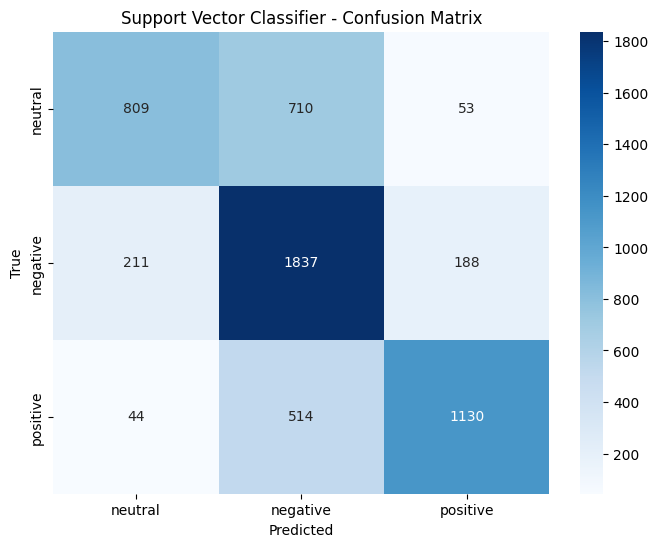

In [18]:
# Generate and plot the confusion matrix for Support Vector Classifier
y_pred = svc.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['sentiment'].unique(), yticklabels=df['sentiment'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Support Vector Classifier - Confusion Matrix')
plt.show()

# Classification Report

In [19]:
print("Classification Report for Support Vector Classifier:\n", classification_report(y_test, y_pred, target_names=df['sentiment'].unique()))

Classification Report for Support Vector Classifier:
               precision    recall  f1-score   support

     neutral       0.76      0.51      0.61      1572
    negative       0.60      0.82      0.69      2236
    positive       0.82      0.67      0.74      1688

    accuracy                           0.69      5496
   macro avg       0.73      0.67      0.68      5496
weighted avg       0.71      0.69      0.68      5496



# Test Your Own Tweet

In [20]:
text = ["I hate twitter"]
sentiment = lr_model.predict(tfidf_vectorizer.transform(text))
print(sentiment)

['negative']


In [21]:
text = ["Weather is too awsome today"]
sentiment = lr_model.predict(tfidf_vectorizer.transform(text))
print(sentiment)

['positive']
